# Prepare the prediction files
## 1. Divide the proteins found in the elm_instances.fasta file downloaded from the ELM database to three fasta files according to their taxonomic group, and remove the redundancy (some proteins are found more than once due to the presence of more than one true positive instance in them. 

***You must have Biopython installed***

In [4]:
%%bash

#extract_fasta_seq.py will be used to extract the protein sequences corresponding to each taxonomic group


python3 scripts/extract_fasta_seq.py elm_instances.fasta elm_instances_with_taxa.csv 

#remove duplicated protein sequences 
python3 scripts/filter_duplicates_in_complete_fasta.py eukaryotes_complete.fasta
python3 scripts/filter_duplicates_in_complete_fasta.py bacteria_complete.fasta
python3 scripts/filter_duplicates_in_complete_fasta.py viruses_complete.fasta

#for viruses we will cut the polyproteins based on their uniprot annotation, the output fasta file is manually adjusted as per the methods section
python3 scripts/extract_viral_proteins.py viruses/viruses_TP.csv viruses_complete_filtered.fasta

#move extracted fasta files to their corresponding folders
mv eukaryotes_complete.fasta eukaryotes/
mv eukaryotes_complete_filtered.fasta eukaryotes/

mv bacteria_complete.fasta bacteria/
mv bacteria_complete_filtered.fasta bacteria/

mv viruses_complete.fasta viruses/
rm viruses_complete_filtered.fasta 
mv viruses_cut_polyproteins.fasta temp_files/

## 2. Running disorder predictions:

A. ***Upload the protein fasta file corresponding to each taxonomic group to IUPRED 2A to get the results file for disorder.***   
B. ***Create a folder called iupred_disorder and put in the IUPred 2A webserver results.*** 
(we have done these two steps and in this analysis the results were called (TaxonomicGroup_complete_filtered.result))   
C. Extract disorder scores and map them to the fasta files based on cutoff values (0.4 and 0.5) and create a CSV matrix file of iupred scores for each protein sequence.


In [5]:
%%bash 

# run the extract_disorder_score.py to extract the scores and generate the disorder fasta files.


cd iupred_disorder/

python3 ../scripts/extract_disorder_scores.py eukaryotes_complete_filtered_long.result eukaryotes_complete_filtered_short.result

mkdir eukaryotes
mv eukaryotes* eukaryotes/

python3 ../scripts/extract_disorder_scores.py bacteria_complete_filtered_long.result bacteria_complete_filtered_short.result

mkdir bacteria
mv bacteria* bacteria/

python3 ../scripts/extract_disorder_scores.py viruses_complete_filtered_long.result viruses_complete_filtered_short.result

mkdir viruses
mv viruses* viruses/

cd ..


/home/heidy/Desktop/ELM_submission_copy/iupred_disorder
mv: cannot move 'eukaryotes' to a subdirectory of itself, 'eukaryotes/eukaryotes'
mv: cannot move 'bacteria' to a subdirectory of itself, 'bacteria/bacteria'
mv: cannot move 'viruses' to a subdirectory of itself, 'viruses/viruses'
/home/heidy/Desktop/ELM_submission_copy


## 3. Running accessibility and secondary structure predictions using NetSurfP 2.0

local NetSurfP 2.0 version was used to run the analysis on the protein fasta file for each specific category (eukaryotes, viruses, etc.)

***The results files of NetSurfP that were used can be found in the netsurfp_output folder***

NetSurfP produces many folders, one for each sequence, and a csv file that have all the predictions for all the protein sequences in the input file. We will use this CSV file and it will be renamed as (TaxonomicGroup_complete_HHsuite_netsurfp.csv)


## 4. Extract disorder, accessibility and secondary structure data for each instance in every taxonomic group and add these column data to the initial instances file for each taxonomic group.

Using the extract_predictions_per_instance.py script and the following 3 input files: TaxonomicGroup_TP.csv, TaxonomicGroup_complete_HHsuite_netsurfp.csv file and the TaxonomicGroup_diso_scores.csv generated from extract_disorder_scores.py script, a new file will be generated that contains the extracted prediction information per instance and the output file will be named TaxonomicGroup_TP_full_predictions.csv


In [7]:
%%bash

#extract eukaryotes predictions per instance and add predictions data columns it to the eukaryotes_TP.csv file

cd eukaryotes/

python3 ../scripts/extract_predictions_per_instance.py eukaryotes_TP.csv ../netsurfp_output/eukaryotes_complete_HHsuite_netsurfp.csv ../iupred_disorder/eukaryotes/eukaryotes_long_diso_scores.csv ../iupred_disorder/eukaryotes/eukaryotes_short_diso_scores.csv


#extract bacteria predictions per instance and add predictions data columns it to the bacteria_TP.csv file
cd ../bacteria/
python3 ../scripts/extract_predictions_per_instance.py bacteria_TP.csv ../netsurfp_output/bacteria_complete_HHsuite_netsurfp.csv ../iupred_disorder/bacteria/bacteria_long_diso_scores.csv ../iupred_disorder/bacteria/bacteria_short_diso_scores.csv


#extract viruses predictions per instance and add predictions data columns it to the viruses_TP.csv file
cd ../viruses/
python3 ../scripts/extract_predictions_per_instance_viruses.py viruses_TP.csv ../netsurfp_output/viruses_complete_HHsuite_netsurfp.csv ../iupred_disorder/viruses/viruses_long_diso_scores.csv ../iupred_disorder/viruses/viruses_short_diso_scores.csv

# return to the main directory (ELM_submission)
cd ..

In [1]:
%%bash

## Add all files to one file

head -1 eukaryotes/eukaryotes_TP_full_predictions.csv > all_TP_full_predictions.csv

tail -n +2 -q eukaryotes/eukaryotes_TP_full_predictions.csv bacteria/bacteria_TP_full_predictions.csv viruses/viruses_TP_full_predictions.csv >> all_TP_full_predictions.csv

head: cannot open 'eukaryotes/eukaryotes_TP_full_predictions.csv' for reading: No such file or directory
tail: cannot open 'eukaryotes/eukaryotes_TP_full_predictions.csv' for reading: No such file or directory
tail: cannot open 'bacteria/bacteria_TP_full_predictions.csv' for reading: No such file or directory
tail: cannot open 'viruses/viruses_TP_full_predictions.csv' for reading: No such file or directory


CalledProcessError: Command 'b'\n## Add all files to one file\n\nhead -1 eukaryotes/eukaryotes_TP_full_predictions.csv > all_TP_full_predictions.csv\n\ntail -n +2 -q eukaryotes/eukaryotes_TP_full_predictions.csv bacteria/bacteria_TP_full_predictions.csv viruses/viruses_TP_full_predictions.csv >> all_TP_full_predictions.csv\n'' returned non-zero exit status 1.

# 1. MIDS boxplots
## A. i. Generate the boxplots for long IUPRED 2A prediction by ELM type

/home/heidy/Desktop/ELM_submission_copy


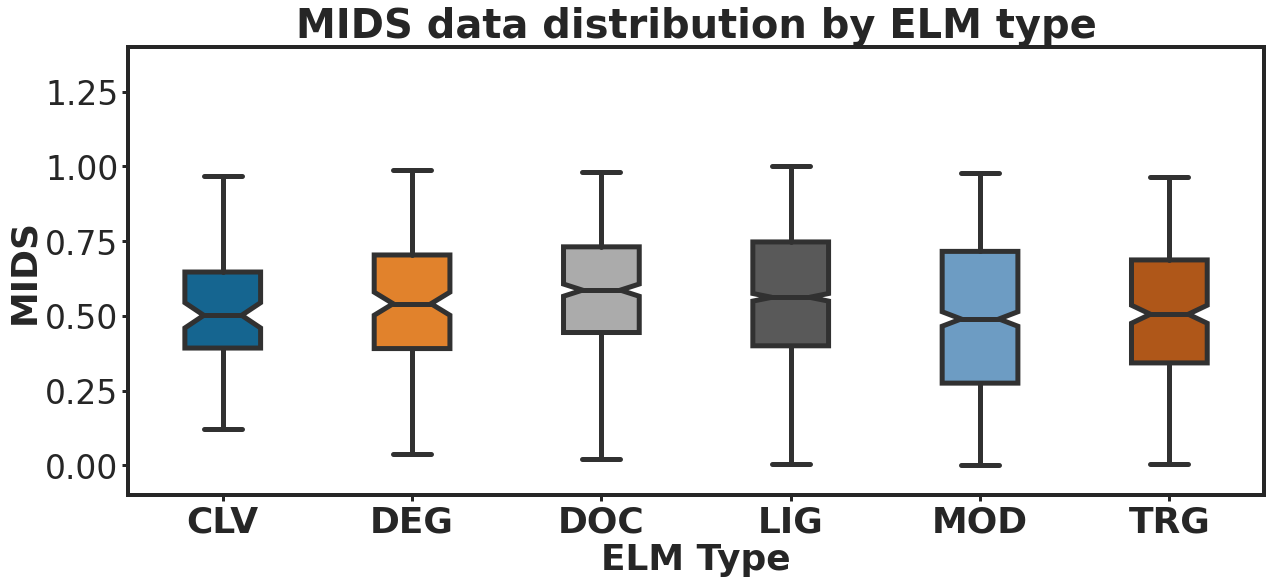

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pwd
analysis_table=pd.read_csv('all_TP_full_predictions.csv')
analysis_table.Taxonomic_group.replace({ 'Eukaryote.*' : 'eukaryotes', 'Bacteria': 'bacteria','Viruses.*': 'viruses'}, regex=True, inplace=True)  

sns.set(font_scale = 3)
sns.set_style('ticks') 
fig, axes = plt.subplots()
fig.set_size_inches(20, 10) 
fig.tight_layout(pad=3)

ax = plt.gca()
ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

elm_type_palette= {'CLV': '#006BA4', 'DEG': '#FF800E', 'DOC': '#ABABAB', 'LIG': '#595959', 'MOD': '#5F9ED1', 'TRG': '#C85200'}

order=['CLV', 'DEG', 'DOC', 'LIG', 'MOD', 'TRG']

boxplot= sns.boxplot(data=analysis_table, y=analysis_table.Long_MIDS_per_instance, x='ELMType', palette= elm_type_palette, order=['CLV', 'DEG', 'DOC', 'LIG', 'MOD', 'TRG'],
             width= 0.4 , linewidth= 5, notch=True )

plt.ylim(-0.1,1.4)
boxplot.axes.set_title('MIDS data distribution by ELM type',fontsize=40, fontweight='bold') 
boxplot.set_xlabel("ELM Type",fontsize=36, fontweight='bold')

boxplot.set_ylabel("Long IUPRED2A MIDS",fontsize=36, fontweight='bold')  #count per residue

boxplot.set_xticklabels(boxplot.get_xticklabels(), fontsize=36, fontweight='bold') 


axes.get_figure().savefig('Long_MIDS_boxplots_by_ELM_type.png', dpi=600, bbox_inches='tight')

In [10]:
!mkdir Figures

!mv Long_MIDS_boxplots_by_ELM_type.png Figures/


## A. ii. Generate the boxplots for short disorder IUPRED 2A prediction by ELM type

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pwd
analysis_table=pd.read_csv('all_TP_full_predictions.csv')
analysis_table.Taxonomic_group.replace({ 'Eukaryote.*' : 'eukaryotes', 'Bacteria': 'bacteria','Viruses.*': 'viruses'}, regex=True, inplace=True)  

sns.set(font_scale = 3)
sns.set_style('ticks') 
fig, axes = plt.subplots()
fig.set_size_inches(20, 10) 
fig.tight_layout(pad=3)

ax = plt.gca()
ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

elm_type_palette= {'CLV': '#006BA4', 'DEG': '#FF800E', 'DOC': '#ABABAB', 'LIG': '#595959', 'MOD': '#5F9ED1', 'TRG': '#C85200'}

order=['CLV', 'DEG', 'DOC', 'LIG', 'MOD', 'TRG']

boxplot= sns.boxplot(data=analysis_table, y=analysis_table.Short_MIDS_per_instance, x='ELMType', palette= elm_type_palette, order=['CLV', 'DEG', 'DOC', 'LIG', 'MOD', 'TRG'],
             width= 0.4 , linewidth= 5, notch=True )

plt.ylim(-0.1,1.4)
boxplot.axes.set_title('MIDS data distribution by ELM type',fontsize=40, fontweight='bold') 
boxplot.set_xlabel("ELM Type",fontsize=36, fontweight='bold')

boxplot.set_ylabel("Short IUPRED2A MIDS",fontsize=36, fontweight='bold')  #count per residue

boxplot.set_xticklabels(boxplot.get_xticklabels(), fontsize=36, fontweight='bold') 


axes.get_figure().savefig('Short_MIDS_boxplots_by_ELM_type.png', dpi=600, bbox_inches='tight')

In [ ]:
!mv Short_MIDS_boxplots_by_ELM_type.png Figures/

## B. i. Long disorder MIDS boxplots divided by taxonomic groups and ELM type

/tmp/ipykernel_11401/4118568331.py:41: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


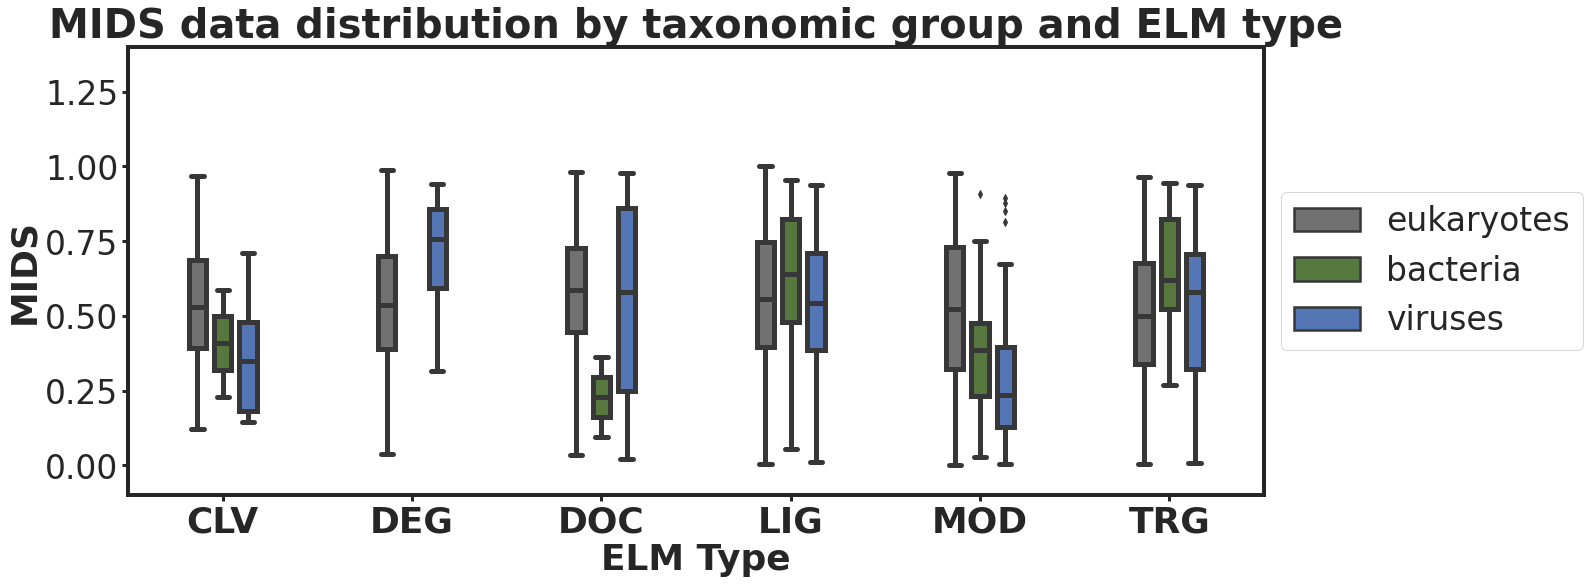

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
import seaborn as sns
import numpy as np
%matplotlib inline


#function to adjust boxplot size (found on https://stackoverflow.com/questions/56838187/how-to-create-spacing-between-same-subgroup-in-seaborn-boxplot)
def adjust_box_widths(g, fac): 
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])
                        

analysis_table=pd.read_csv('all_TP_full_predictions.csv')
analysis_table.Taxonomic_group.replace({ 'Eukaryote.*' : 'eukaryotes', 'Bacteria': 'bacteria','Viruses.*': 'viruses'}, regex=True, inplace=True)  

sns.set(font_scale = 3)
sns.set_style('ticks') 
fig, axes = plt.subplots()
fig.set_size_inches(20, 10) 
fig.tight_layout(pad=3)

ax = plt.gca()
ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
taxonomy_palette={'viruses':'#4472C4', 'bacteria':'#548235','eukaryotes':'#717171'} 


order=['CLV', 'DEG', 'DOC', 'LIG', 'MOD', 'TRG']


boxplot1= sns.boxplot(data=analysis_table, y=analysis_table.Long_MIDS_per_instance, x='ELMType', hue='Taxonomic_group', palette= taxonomy_palette, order=['CLV', 'DEG', 'DOC', 'LIG', 'MOD', 'TRG'],
             width= 0.4 , linewidth= 5)

plt.ylim(-0.1,1.4)
boxplot1.axes.set_title('MIDS data distribution by taxonomic group and ELM type',fontsize=40, fontweight='bold') 
boxplot1.set_xlabel("ELM Type",fontsize=36, fontweight='bold')

boxplot1.set_ylabel("Long IUPRED2A MIDS",fontsize=36, fontweight='bold')  

boxplot1.set_xticklabels(boxplot.get_xticklabels(), fontsize=36, fontweight='bold') 
adjust_box_widths(fig, 0.7)
boxplot1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes.get_figure().savefig('Long_MIDS_boxplots_taxonomic_ELM_type.png', dpi=600)



In [ ]:
!mv Long_MIDS_boxplots_taxonomic_ELM_type.png Figures/ 

## B. ii. Short disorder MIDS boxplots divided by taxonomic groups and ELM type

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
import seaborn as sns
import numpy as np
%matplotlib inline


#function to adjust boxplot size (found on https://stackoverflow.com/questions/56838187/how-to-create-spacing-between-same-subgroup-in-seaborn-boxplot)
def adjust_box_widths(g, fac): 
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])
                        

analysis_table=pd.read_csv('all_TP_full_predictions.csv')
analysis_table.Taxonomic_group.replace({ 'Eukaryote.*' : 'eukaryotes', 'Bacteria': 'bacteria','Viruses.*': 'viruses'}, regex=True, inplace=True)  

sns.set(font_scale = 3)
sns.set_style('ticks') 
fig, axes = plt.subplots()
fig.set_size_inches(20, 10) 
fig.tight_layout(pad=3)

ax = plt.gca()
ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
taxonomy_palette={'viruses':'#4472C4', 'bacteria':'#548235','eukaryotes':'#717171'} 


order=['CLV', 'DEG', 'DOC', 'LIG', 'MOD', 'TRG']


boxplot1= sns.boxplot(data=analysis_table, y=analysis_table.Short_MIDS_per_instance, x='ELMType', hue='Taxonomic_group', palette= taxonomy_palette, order=['CLV', 'DEG', 'DOC', 'LIG', 'MOD', 'TRG'],
             width= 0.4 , linewidth= 5)

plt.ylim(-0.1,1.4)
boxplot1.axes.set_title('MIDS data distribution by taxonomic group and ELM type',fontsize=40, fontweight='bold') 
boxplot1.set_xlabel("ELM Type",fontsize=36, fontweight='bold')

boxplot1.set_ylabel("Short IUPRED2A MIDS",fontsize=36, fontweight='bold')  

boxplot1.set_xticklabels(boxplot.get_xticklabels(), fontsize=36, fontweight='bold') 
adjust_box_widths(fig, 0.7)
boxplot1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes.get_figure().savefig('Short_MIDS_boxplots_taxonomic_ELM_type.png', dpi=600)

In [ ]:
!mv Short_MIDS_boxplots_taxonomic_ELM_type.png Figures/ 

# 1. MCCS boxplots
## A. Generate the boxplots by ELM type

/home/heidy/Desktop/ELM_submission_copy


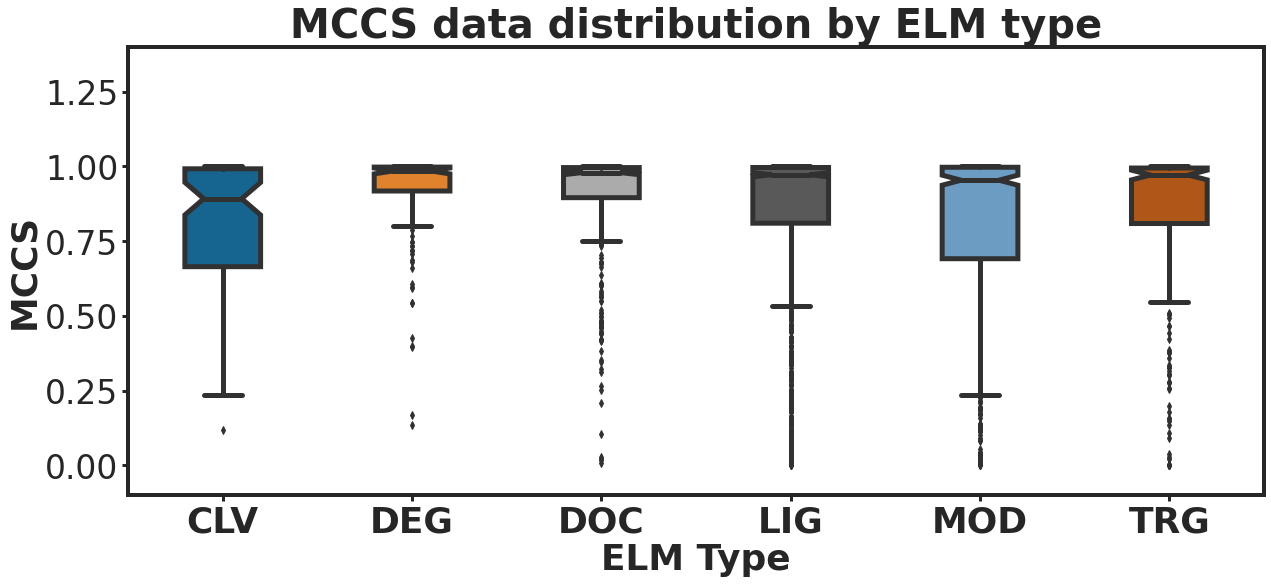

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pwd
analysis_table=pd.read_csv('all_TP_full_predictions.csv')
analysis_table.Taxonomic_group.replace({ 'Eukaryote.*' : 'eukaryotes', 'Bacteria': 'bacteria','Viruses.*': 'viruses'}, regex=True, inplace=True)  

sns.set(font_scale = 3)
sns.set_style('ticks') 
fig, axes = plt.subplots()
fig.set_size_inches(20, 10) 
fig.tight_layout(pad=3)

ax = plt.gca()
ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

elm_type_palette= {'CLV': '#006BA4', 'DEG': '#FF800E', 'DOC': '#ABABAB', 'LIG': '#595959', 'MOD': '#5F9ED1', 'TRG': '#C85200'}


boxplot2= sns.boxplot(data=analysis_table, y=analysis_table.MCCS_per_instance, x='ELMType', palette= elm_type_palette, order=['CLV', 'DEG', 'DOC', 'LIG', 'MOD', 'TRG'],
             width= 0.4 , linewidth= 5, notch=True )

plt.ylim(-0.1,1.4)
boxplot2.axes.set_title('MCCS data distribution by ELM type',fontsize=40, fontweight='bold') 
boxplot2.set_xlabel("ELM Type",fontsize=36, fontweight='bold')

boxplot2.set_ylabel("MCCS",fontsize=36, fontweight='bold') 

boxplot2.set_xticklabels(boxplot.get_xticklabels(), fontsize=36, fontweight='bold') 


axes.get_figure().savefig('MCCS_boxplots_by_ELM_type.png', dpi=600, bbox_inches='tight')



In [ ]:
!mv MCCS_boxplots_by_ELM_type.png Figures/ 

## B. MCCS boxplots divided by taxonomic groups and ELM type

/tmp/ipykernel_11401/108745543.py:39: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


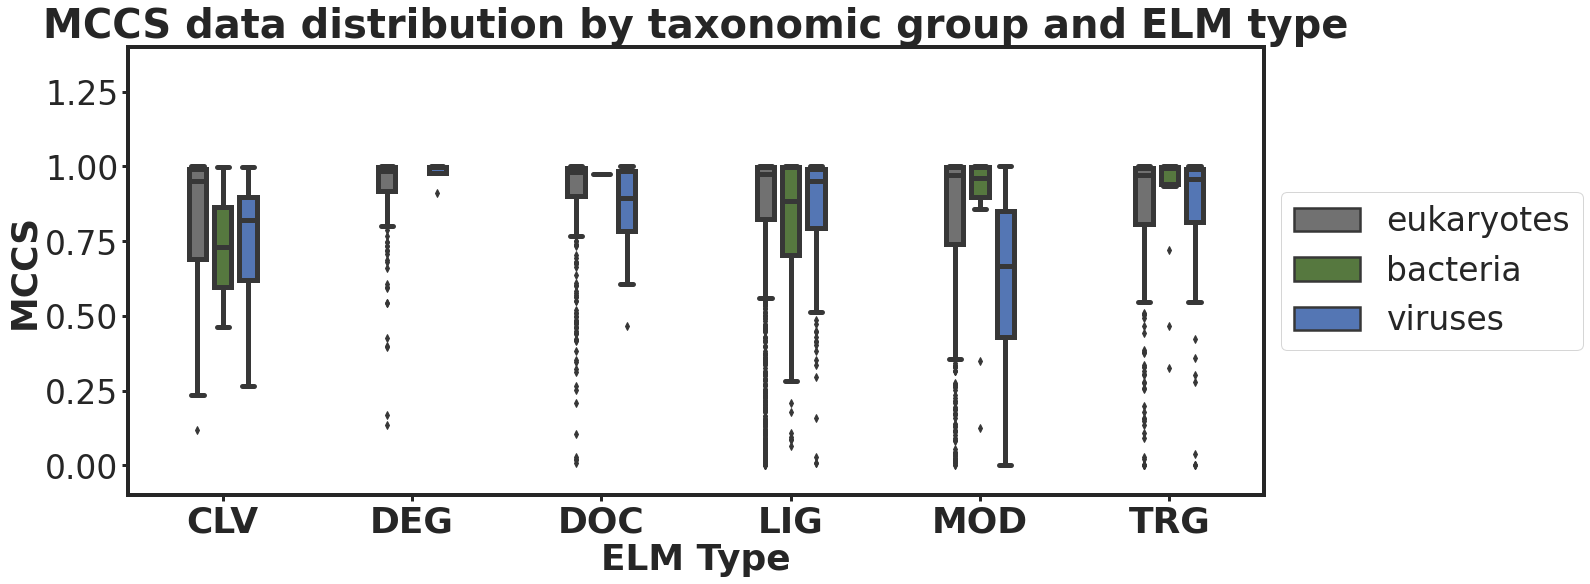

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
import seaborn as sns
import numpy as np
%matplotlib inline

#function to adjust boxplot size (found on https://stackoverflow.com/questions/56838187/how-to-create-spacing-between-same-subgroup-in-seaborn-boxplot)
def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])
                        

analysis_table=pd.read_csv('all_TP_full_predictions.csv')
analysis_table.Taxonomic_group.replace({ 'Eukaryote.*' : 'eukaryotes', 'Bacteria': 'bacteria','Viruses.*': 'viruses'}, regex=True, inplace=True)  

sns.set(font_scale = 3)#control scale on y axis
sns.set_style('ticks') 
fig, axes = plt.subplots()
fig.set_size_inches(20, 10) 
fig.tight_layout(pad=3)

ax = plt.gca()
ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
taxonomy_palette={'viruses':'#4472C4', 'bacteria':'#548235','eukaryotes':'#717171'} 


order=['CLV', 'DEG', 'DOC', 'LIG', 'MOD', 'TRG']


boxplot3= sns.boxplot(data=analysis_table, y=analysis_table.MCCS_per_instance, x='ELMType', hue='Taxonomic_group', palette= taxonomy_palette, order=['CLV', 'DEG', 'DOC', 'LIG', 'MOD', 'TRG'],
             width= 0.4 , linewidth= 5)

plt.ylim(-0.1,1.4)
boxplot3.axes.set_title('MCCS data distribution by taxonomic group and ELM type',fontsize=40, fontweight='bold') 
boxplot3.set_xlabel("ELM Type",fontsize=36, fontweight='bold')

boxplot3.set_ylabel("MCCS",fontsize=36, fontweight='bold')  #count per residue

boxplot3.set_xticklabels(boxplot.get_xticklabels(), fontsize=36, fontweight='bold') 
adjust_box_widths(fig, 0.7)
boxplot3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes.get_figure().savefig('MCCS_boxplots_taxonomic_ELM_type.png', dpi=600)

In [14]:
!mv MCCS_boxplots_taxonomic_ELM_type.png Figures/ 

# Do statistical comparisons using Mann Whitney test between groups

In [16]:
import pandas as pd
import csv
!pwd
analysis_table=pd.read_csv('all_TP_full_predictions.csv')
analysis_table.Taxonomic_group.replace({ 'Eukaryote.*' : 'eukaryotes', 'Bacteria': 'bacteria','Viruses.*': 'viruses'}, regex=True, inplace=True)  
#print(type(analysis_table))
analysis_table.to_csv('all_TP_simplified_predictions.csv', encoding='utf-8', index=False, header= True)



/home/heidy/Desktop/ELM_submission_copy
<class 'pandas.core.frame.DataFrame'>


In [17]:
#calculate the p-value for long disorder IUPRED2A MIDS comparison between groups (These are the unadjusted p-values)
#adjusted p-values can be found in Table S1

%run scripts/MannWhitney_statitistics_calculation_long_MIDS.py all_TP_simplified_predictions.csv 

MIDS comparison by ELM type between taxonomic groups
CLV_euk vs. CLV_bac Statistics=99.00, p=0.479836
CLV_euk vs. CLV_virus Statistics=669.00, p=0.007155
CLV_bac vs. CLV_virus Statistics=16.00, p=0.549451
DEG_euk vs. DEG_virus Statistics=194.00, p=0.197711
DOC_euk vs. DOC_virus Statistics=2529.00, p=0.875238
DOC_euk vs. DOC_bac Statistics=874.00, p=0.038688
DOC_bac vs. DOC_virus Statistics=5.00, p=0.307692
LIG_euk vs. LIG_virus Statistics=115123.00, p=0.505285
LIG_euk vs. LIG_bac Statistics=53218.50, p=0.010222
LIG_bac vs. LIG_virus Statistics=6549.00, p=0.010167
MOD_euk vs. MOD_virus Statistics=40183.50, p=0.000000
MOD_euk vs. MOD_bac Statistics=7263.00, p=0.084194
MOD_bac vs. MOD_virus Statistics=798.00, p=0.039487
TRG_euk vs. TRG_virus Statistics=4905.00, p=0.230595
TRG_euk vs. TRG_bac Statistics=1409.00, p=0.025504
TRG_bac vs. TRG_virus Statistics=400.00, p=0.269228

 MIDS Virus analysis
CLV_virus vs. DEG_virus Statistics=7.00, p=0.041758
CLV_virus vs. DOC_virus Statistics=45.00, p

In [ ]:
#calculate the p-value for short disorder IUPRED2A MIDS comparison between groups (These are the unadjusted p-values)
#adjusted p-values can be found in Table S1

%run scripts/MannWhitney_statitistics_calculation_short_MIDS.py all_TP_simplified_predictions.csv 

In [18]:
#calculate the p-value for MCCS comparison between groups (These are the unadjusted p-values)
#adjusted p-values can be found in Table S1

%run scripts/MannWhitney_statitistics_calculation_MCCS.py all_TP_simplified_predictions.csv 

MCCS comparison by ELM type between taxonomic groups
CLV_euk vs. CLV_bac Statistics=80.00, p=0.885851
CLV_euk vs. CLV_virus Statistics=579.00, p=0.113712
CLV_bac vs. CLV_virus Statistics=12.00, p=1.000000
DEG_euk vs. DEG_virus Statistics=181.00, p=0.151647
DOC_euk vs. DOC_virus Statistics=3276.00, p=0.141621
DOC_euk vs. DOC_bac Statistics=502.00, p=0.883482
DOC_bac vs. DOC_virus Statistics=14.00, p=0.641026
LIG_euk vs. LIG_virus Statistics=124295.00, p=0.023210
LIG_euk vs. LIG_bac Statistics=72457.00, p=0.052848
LIG_bac vs. LIG_virus Statistics=5197.00, p=0.628579
MOD_euk vs. MOD_virus Statistics=40525.00, p=0.000000
MOD_euk vs. MOD_bac Statistics=5621.00, p=0.833071
MOD_bac vs. MOD_virus Statistics=955.00, p=0.000219
TRG_euk vs. TRG_virus Statistics=6068.00, p=0.325654
TRG_euk vs. TRG_bac Statistics=1523.00, p=0.061316
TRG_bac vs. TRG_virus Statistics=451.00, p=0.046349

 MCCS Virus analysis
CLV_virus vs. DEG_virus Statistics=4.00, p=0.013187
CLV_virus vs. DOC_virus Statistics=47.00, 

# Plotting the data (MIDS and MCCS histograms)
## 1. Virus data MIDS and MCCS histograms

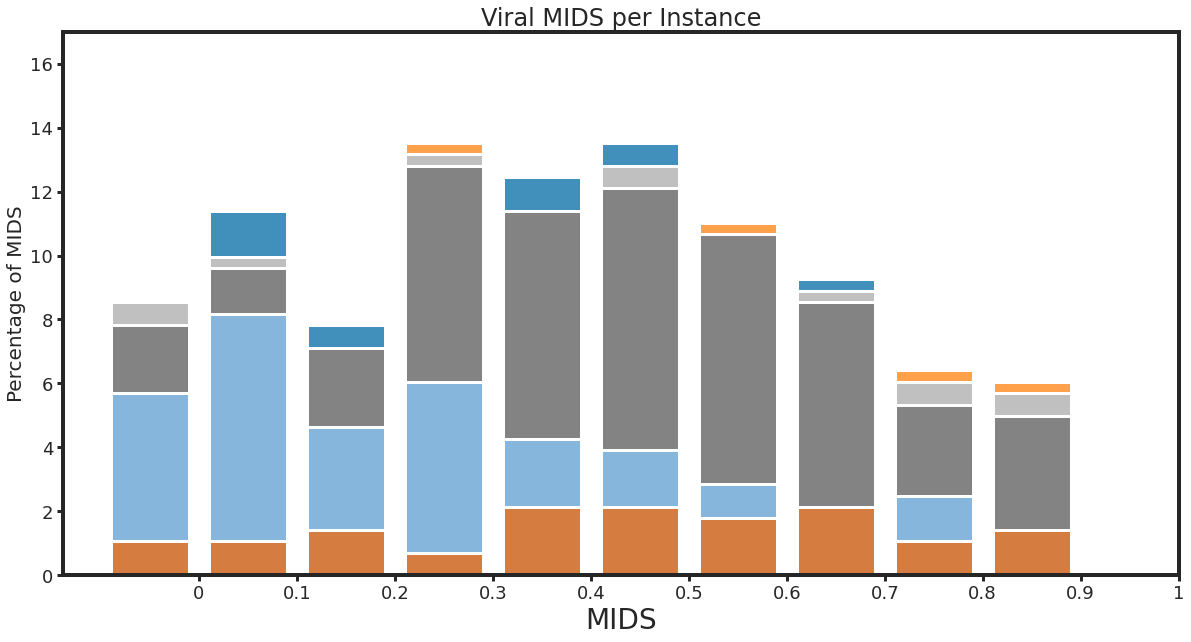

In [23]:
#Long disorder prediction by IUPRED2A MIDS histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

viruses=pd.read_csv('viruses/viruses_TP_full_predictions.csv') 


fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

elm_type_palette= {'CLV': '#006BA4', 'DEG': '#FF800E', 'DOC': '#ABABAB', 'LIG': '#595959', 'MOD': '#5F9ED1', 'TRG': '#C85200'}


histogram= sns.histplot(data= viruses, x='Long_MIDS_per_instance',hue= 'ELMType' ,binrange=(0,1), binwidth=0.1 ,palette= elm_type_palette, multiple='stack', stat='probability', edgecolor='black', linewidth=3)

plt.title('Viral MIDS per Instance', fontsize=36)
plt.xlabel('Long IUPRED2A MIDS', fontsize=28)
plt.ylabel('Percentage of SLiMs', fontsize=36)
plt.ylim(0, 0.17)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1],['0','0.1','0.2','0.3','0.4','0.5', '0.6', '0.7', '0.8', '0.9', '1'], fontsize=24)
plt.yticks([0.00, 0.04,  0.08, 0.12, 0.16, 0.2, 0.24, 0.26 ],['0', '4',  '8',  '12', '16',  '20',  '24', ''], fontsize=36)

ax = plt.gca()
ax.tick_params(width=3)

ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

plt.legend([],[], frameon=False)

ax.get_figure().savefig('Viruses_long_MIDS_distribution_colored_by_ELM_type.png', dpi=600)



In [24]:
# move to Figures directory
!mv Viruses_long_MIDS_distribution_colored_by_ELM_type.png Figures/ 

In [ ]:
#Short disorder prediction by IUPRED2A MIDS histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

viruses=pd.read_csv('viruses/viruses_TP_full_predictions.csv') 


fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

elm_type_palette= {'CLV': '#006BA4', 'DEG': '#FF800E', 'DOC': '#ABABAB', 'LIG': '#595959', 'MOD': '#5F9ED1', 'TRG': '#C85200'}


histogram= sns.histplot(data= viruses, x='Short_MIDS_per_instance',hue= 'ELMType' ,binrange=(0,1), binwidth=0.1 ,palette= elm_type_palette, multiple='stack', stat='probability', edgecolor='black', linewidth=3)

plt.title('Viral MIDS per Instance', fontsize=36)
plt.xlabel('Short IUPRED2A MIDS', fontsize=28)
plt.ylabel('Percentage of SLiMs', fontsize=36)
plt.ylim(0, 0.17)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1],['0','0.1','0.2','0.3','0.4','0.5', '0.6', '0.7', '0.8', '0.9', '1'], fontsize=24)
plt.yticks([0.00, 0.04,  0.08, 0.12, 0.16, 0.2, 0.24, 0.26 ],['0', '4',  '8',  '12', '16',  '20',  '24', ''], fontsize=36)

ax = plt.gca()
ax.tick_params(width=3)

ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

plt.legend([],[], frameon=False)

ax.get_figure().savefig('Viruses_Short_MIDS_distribution_colored_by_ELM_type.png', dpi=600)

In [ ]:
# move to Figures directory
!mv Viruses_short_MIDS_distribution_colored_by_ELM_type.png Figures/ 

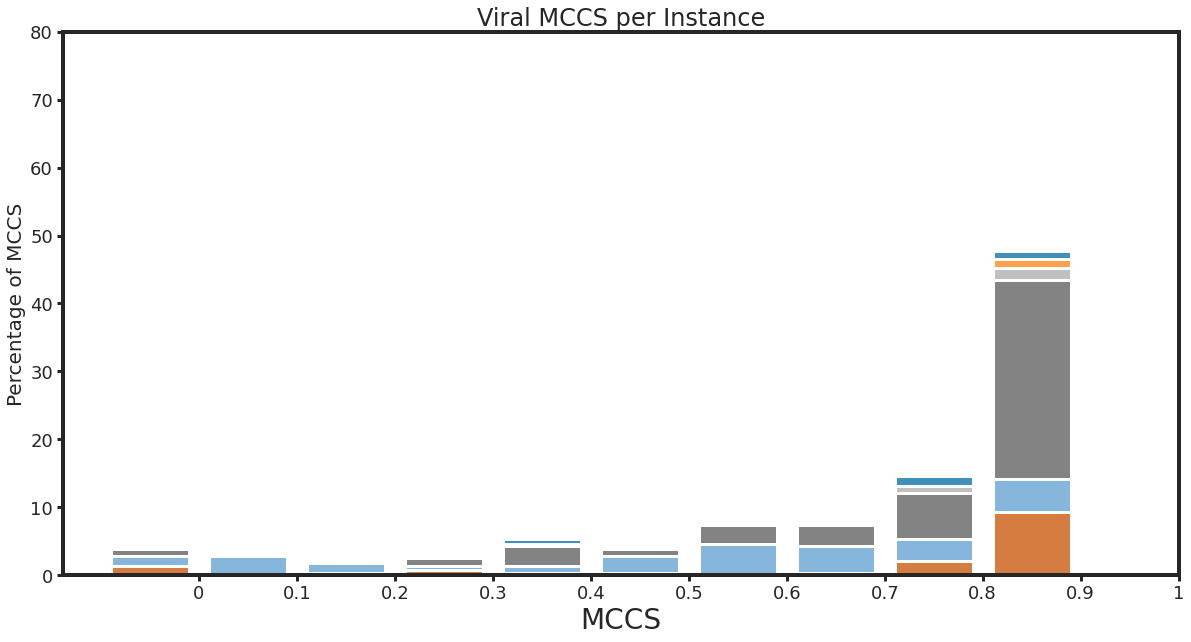

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


viruses=pd.read_csv('viruses/viruses_TP_full_predictions.csv') 


fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

elm_type_palette= {'CLV': '#006BA4', 'DEG': '#FF800E', 'DOC': '#ABABAB', 'LIG': '#595959', 'MOD': '#5F9ED1', 'TRG': '#C85200'}


histogram= sns.histplot(data= viruses, x='MCCS_per_instance',hue= 'ELMType' ,binrange=(0,1), binwidth=0.1 ,palette= elm_type_palette, multiple='stack', stat='probability', edgecolor='black', linewidth=3)

plt.title('Viral MCCS per Instance', fontsize=36)
plt.xlabel('MCCS', fontsize=28)
plt.ylabel('Percentage of SLiMs', fontsize=36)
plt.ylim(0, 0.8)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1],['0','0.1','0.2','0.3','0.4','0.5', '0.6', '0.7', '0.8', '0.9', '1'], fontsize=24)
plt.yticks([0.00, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],['0', '10', '20', '30', '40', '50', '60', '70', '80'], fontsize=24)

ax = plt.gca()
ax.tick_params(width=3)

ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)


plt.legend([],[], frameon=False)

ax.get_figure().savefig('Viruses_MCCS_distribution_colored_by_ELM_type.png', dpi=600)




In [27]:
# move to Figures directory
!mv Viruses_MCCS_distribution_colored_by_ELM_type.png Figures/ 

## 2. Eukaryotes data MIDS and MCCS histograms

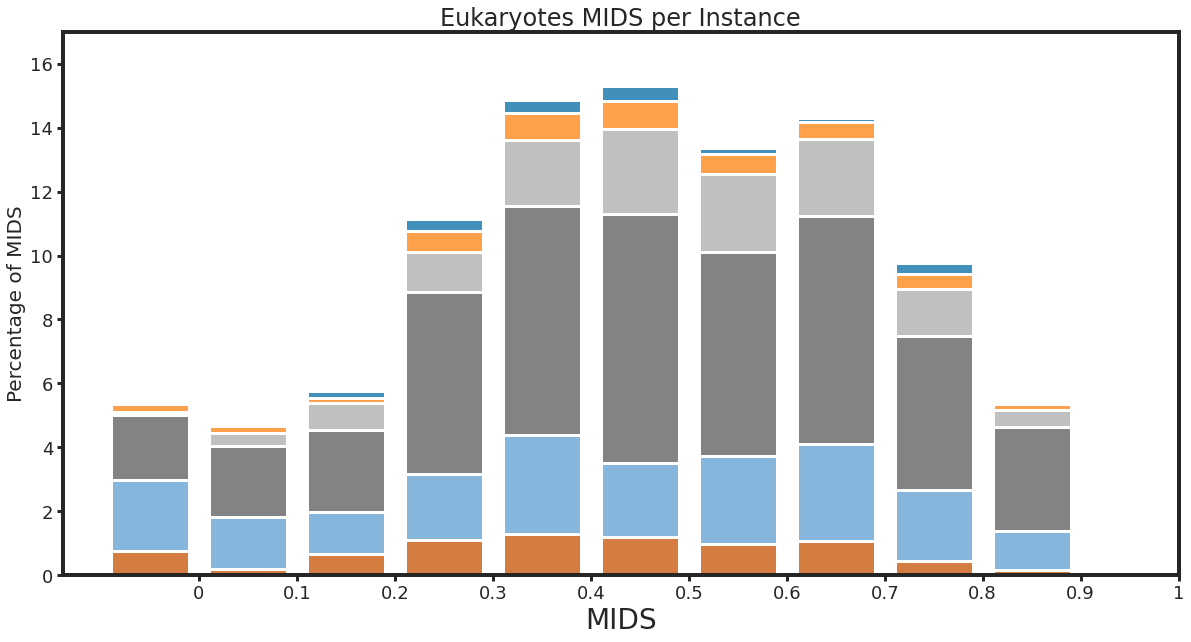

In [28]:
#Long disorder prediction by IUPRED2A MIDS histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


eukaryotes=pd.read_csv('eukaryotes/eukaryotes_TP_full_predictions.csv') 


fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

elm_type_palette= {'CLV': '#006BA4', 'DEG': '#FF800E', 'DOC': '#ABABAB', 'LIG': '#595959', 'MOD': '#5F9ED1', 'TRG': '#C85200'}


histogram= sns.histplot(data= eukaryotes, x='Long_MIDS_per_instance',hue= 'ELMType' ,binrange=(0,1), binwidth=0.1 ,palette= elm_type_palette, multiple='stack', stat='probability', edgecolor='black', linewidth=3)

plt.title('Eukaryotes MIDS per Instance', fontsize=36)
plt.xlabel('Long IUPRED2A MIDS', fontsize=28)
plt.ylabel('Percentage of SLiMs', fontsize=36)
plt.ylim(0, 0.17)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1],['0','0.1','0.2','0.3','0.4','0.5', '0.6', '0.7', '0.8', '0.9', '1'], fontsize=24)
plt.yticks([0.00, 0.04,  0.08, 0.12, 0.16, 0.2, 0.24, 0.26 ],['0', '4',  '8',  '12', '16',  '20',  '24', ''], fontsize=36)

ax = plt.gca()
ax.tick_params(width=3)

ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

plt.legend([],[], frameon=False)

ax.get_figure().savefig('Eukaryotes_long_MIDS_distribution_colored_by_ELM_type.png', dpi=600)



In [29]:
# move the figure to Figures folder
!mv Eukaryotes_long_MIDS_distribution_colored_by_ELM_type.png Figures/ 

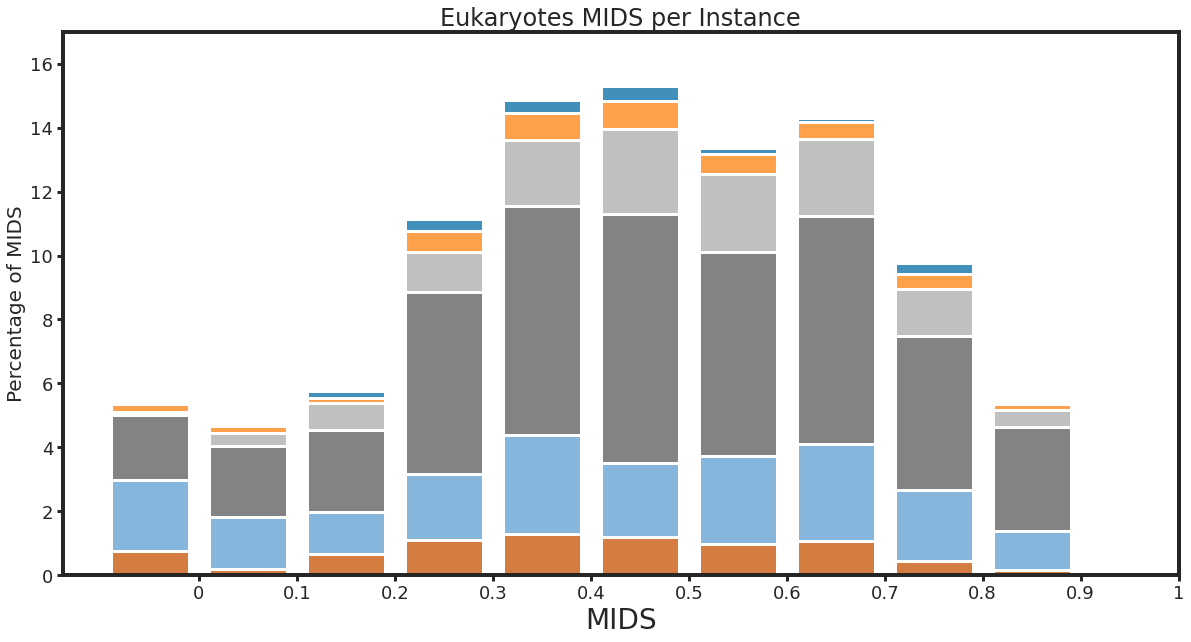

In [28]:
#Short disorder prediction by IUPRED2A MIDS histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


eukaryotes=pd.read_csv('eukaryotes/eukaryotes_TP_full_predictions.csv') 


fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

elm_type_palette= {'CLV': '#006BA4', 'DEG': '#FF800E', 'DOC': '#ABABAB', 'LIG': '#595959', 'MOD': '#5F9ED1', 'TRG': '#C85200'}


histogram= sns.histplot(data= eukaryotes, x='Short_MIDS_per_instance',hue= 'ELMType' ,binrange=(0,1), binwidth=0.1 ,palette= elm_type_palette, multiple='stack', stat='probability', edgecolor='black', linewidth=3)

plt.title('Eukaryotes MIDS per Instance', fontsize=36)
plt.xlabel('Short IUPRED2A MIDS', fontsize=28)
plt.ylabel('Percentage of SLiMs', fontsize=36)
plt.ylim(0, 0.17)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1],['0','0.1','0.2','0.3','0.4','0.5', '0.6', '0.7', '0.8', '0.9', '1'], fontsize=24)
plt.yticks([0.00, 0.04,  0.08, 0.12, 0.16, 0.2, 0.24, 0.26 ],['0', '4',  '8',  '12', '16',  '20',  '24', ''], fontsize=36)

ax = plt.gca()
ax.tick_params(width=3)

ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

plt.legend([],[], frameon=False)

ax.get_figure().savefig('Eukaryotes_short_MIDS_distribution_colored_by_ELM_type.png', dpi=600)



In [29]:
# move the figure to Figures folder
!mv Eukaryotes_short_MIDS_distribution_colored_by_ELM_type.png Figures/ 

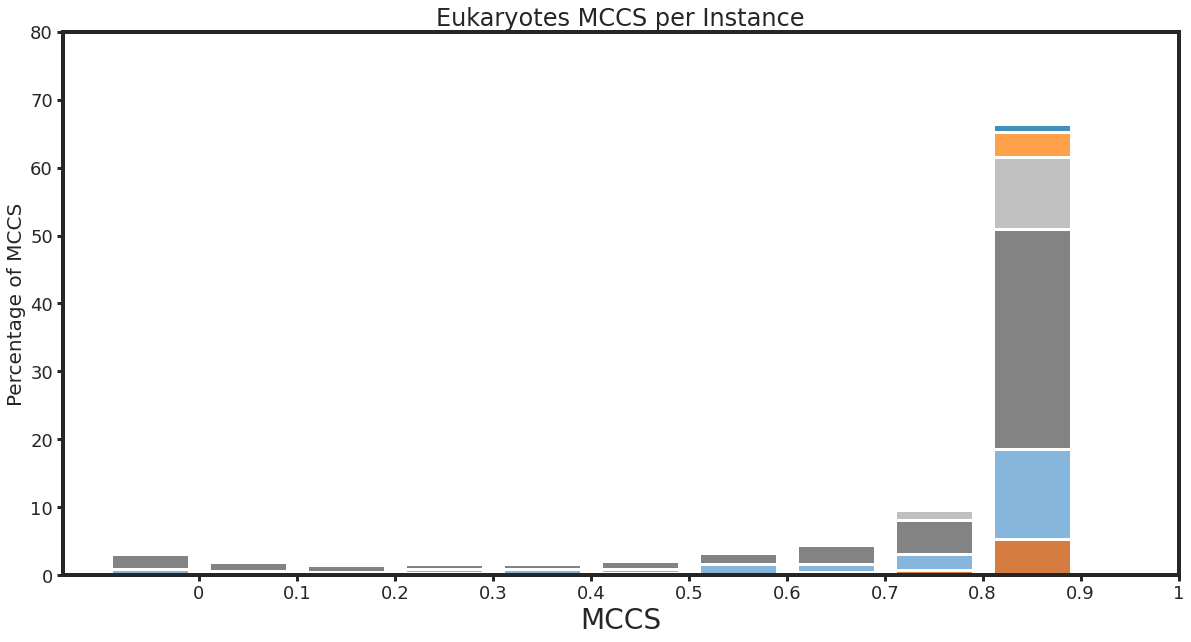

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

eukaryotes=pd.read_csv('eukaryotes/eukaryotes_TP_full_predictions.csv')


fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

elm_type_palette= {'CLV': '#006BA4', 'DEG': '#FF800E', 'DOC': '#ABABAB', 'LIG': '#595959', 'MOD': '#5F9ED1', 'TRG': '#C85200'}


histogram= sns.histplot(data= eukaryotes, x='MCCS_per_instance',hue= 'ELMType' ,binrange=(0,1), binwidth=0.1 ,palette= elm_type_palette, multiple='stack', stat='probability', edgecolor='black', linewidth=3)

plt.title('Eukaryotes MCCS per Instance', fontsize=36)
plt.xlabel('MCCS', fontsize=28)
plt.ylabel('Percentage of SLiMs', fontsize=36)
plt.ylim(0, 0.8)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1],['0','0.1','0.2','0.3','0.4','0.5', '0.6', '0.7', '0.8', '0.9', '1'], fontsize=24)
plt.yticks([0.00, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],['0', '10', '20', '30', '40', '50', '60', '70', '80'], fontsize=24)

ax = plt.gca()
ax.tick_params(width=3)

ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

plt.legend([],[], frameon=False)

ax.get_figure().savefig('Eukaryotes_MCCS_distribution_colored_by_ELM_type.png', dpi=600)



In [31]:
# move the figure to Figures folder
!mv Eukaryotes_MCCS_distribution_colored_by_ELM_type.png Figures/

## 3. Bacterial data MIDS and MCCS histograms

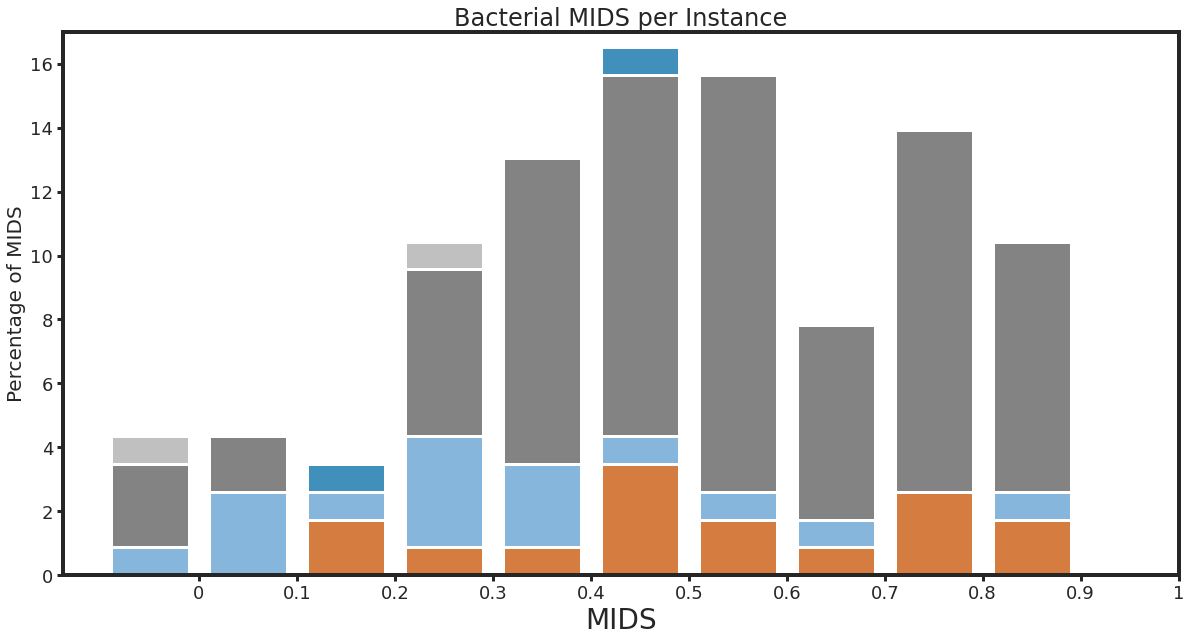

In [32]:
#Long disorder prediction by IUPRED2A MIDS histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

bacteria=pd.read_csv('bacteria/bacteria_TP_full_predictions.csv') 

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

elm_type_palette= {'CLV': '#006BA4', 'DEG': '#FF800E', 'DOC': '#ABABAB', 'LIG': '#595959', 'MOD': '#5F9ED1', 'TRG': '#C85200'}


histogram= sns.histplot(data= bacteria, x='Long_MIDS_per_instance',hue= 'ELMType' ,binrange=(0,1), binwidth=0.1 ,palette= elm_type_palette, multiple='stack', stat='probability', edgecolor='black', linewidth=3)

plt.title('Bacterial MIDS per Instance', fontsize=36)
plt.xlabel('Long IUPRED2A MIDS', fontsize=28)
plt.ylabel('Percentage of SLiMs', fontsize=36)
plt.ylim(0, 0.17)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1],['0','0.1','0.2','0.3','0.4','0.5', '0.6', '0.7', '0.8', '0.9', '1'], fontsize=24)
plt.yticks([0.00, 0.04,  0.08, 0.12, 0.16, 0.2, 0.24, 0.26 ],['0', '4',  '8',  '12', '16',  '20',  '24', ''], fontsize=36)

ax = plt.gca()
ax.tick_params(width=3)

ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

plt.legend([],[], frameon=False)

ax.get_figure().savefig('Bacterial_long_MIDS_distribution_colored_by_ELM_type.png', dpi=600)



In [33]:
# move the figure to Figures folder
!mv Bacterial_long_MIDS_distribution_colored_by_ELM_type.png Figures/ 

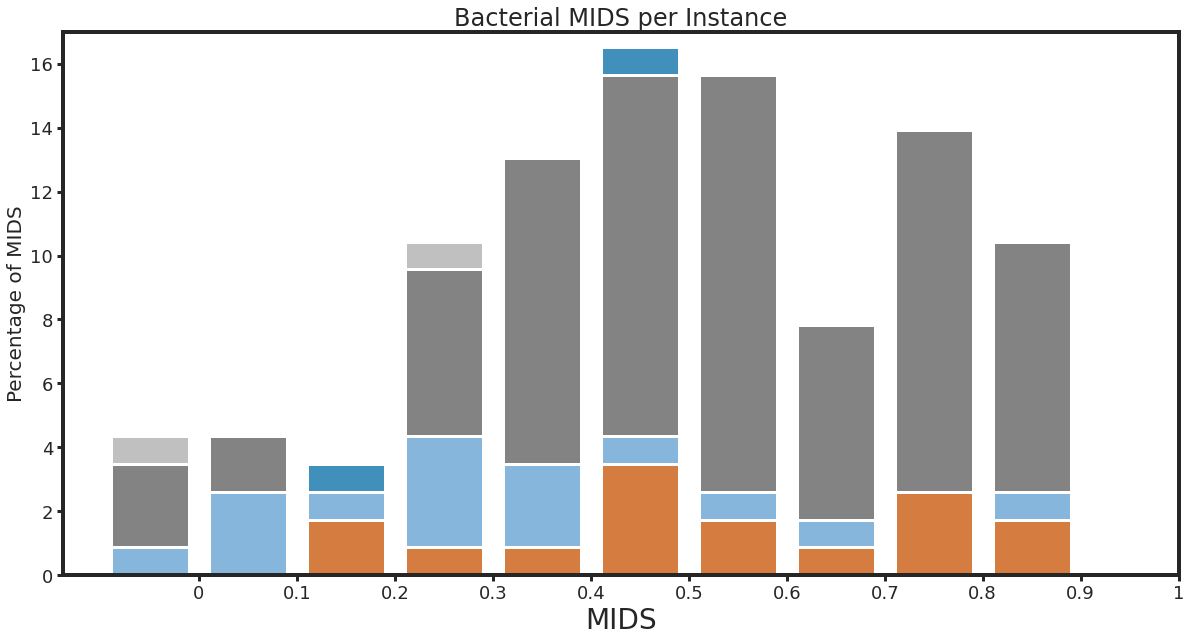

In [32]:
#Short disorder prediction by IUPRED2A MIDS histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

bacteria=pd.read_csv('bacteria/bacteria_TP_full_predictions.csv') 

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

elm_type_palette= {'CLV': '#006BA4', 'DEG': '#FF800E', 'DOC': '#ABABAB', 'LIG': '#595959', 'MOD': '#5F9ED1', 'TRG': '#C85200'}


histogram= sns.histplot(data= bacteria, x='Short_MIDS_per_instance',hue= 'ELMType' ,binrange=(0,1), binwidth=0.1 ,palette= elm_type_palette, multiple='stack', stat='probability', edgecolor='black', linewidth=3)

plt.title('Bacterial MIDS per Instance', fontsize=36)
plt.xlabel('Short IUPRED2A MIDS', fontsize=28)
plt.ylabel('Percentage of SLiMs', fontsize=36)
plt.ylim(0, 0.17)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1],['0','0.1','0.2','0.3','0.4','0.5', '0.6', '0.7', '0.8', '0.9', '1'], fontsize=24)
plt.yticks([0.00, 0.04,  0.08, 0.12, 0.16, 0.2, 0.24, 0.26 ],['0', '4',  '8',  '12', '16',  '20',  '24', ''], fontsize=36)

ax = plt.gca()
ax.tick_params(width=3)

ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

plt.legend([],[], frameon=False)

ax.get_figure().savefig('Bacterial_short_MIDS_distribution_colored_by_ELM_type.png', dpi=600)



In [33]:
# move the figure to Figures folder
!mv Bacterial_short_MIDS_distribution_colored_by_ELM_type.png Figures/ 

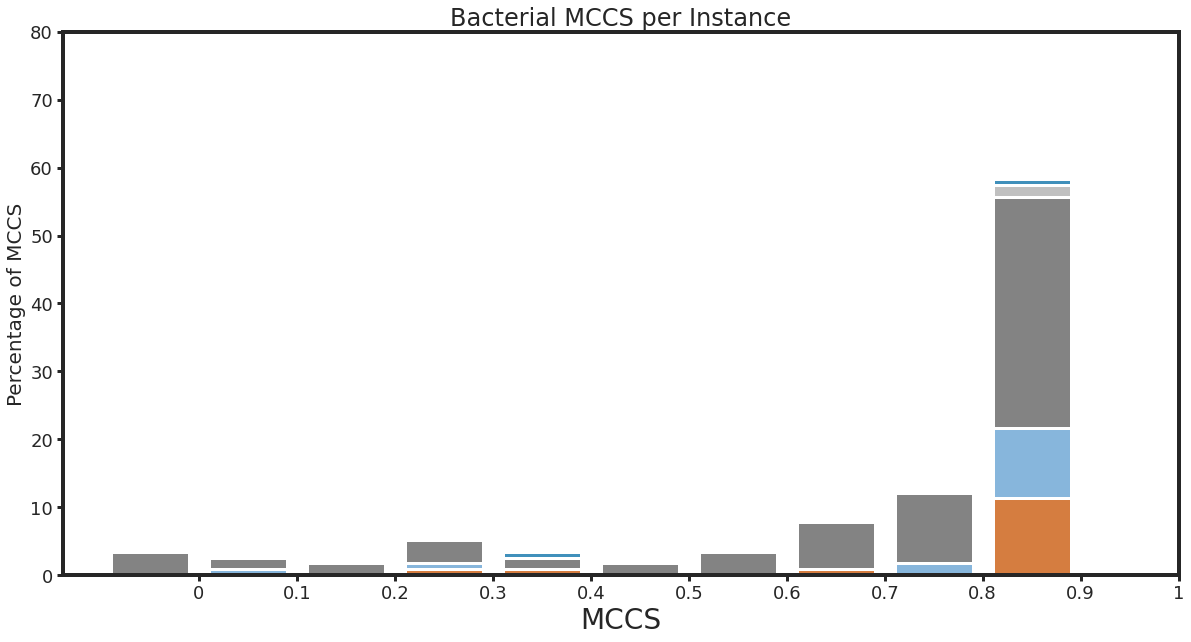

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

bacteria=pd.read_csv('bacteria/bacteria_TP_full_predictions.csv')


fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

elm_type_palette= {'CLV': '#006BA4', 'DEG': '#FF800E', 'DOC': '#ABABAB', 'LIG': '#595959', 'MOD': '#5F9ED1', 'TRG': '#C85200'}


histogram= sns.histplot(data= bacteria, x='MCCS_per_instance',hue= 'ELMType' ,binrange=(0,1), binwidth=0.1 ,palette= elm_type_palette, multiple='stack', stat='probability' , edgecolor='black', linewidth=3)

plt.title('Bacterial MCCS per Instance', fontsize=24)
plt.xlabel('MCCS', fontsize=28)
plt.ylabel('Percentage of SLiMs', fontsize=24)
plt.ylim(0, 0.8)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1],['0','0.1','0.2','0.3','0.4','0.5', '0.6', '0.7', '0.8', '0.9', '1'], fontsize=24)
plt.yticks([0.00, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],['0', '10', '20', '30', '40', '50', '60', '70', '80'], fontsize=24)

ax = plt.gca()
ax.tick_params(width=3)

ax.tick_params(width=3)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

plt.legend([],[], frameon=False)

ax.get_figure().savefig('Bacterial_MCCS_distribution_colored_by_ELM_type.png', dpi=600)



In [35]:
# move the figure to Figures folder
!mv Bacterial_MCCS_distribution_colored_by_ELM_type.png Figures/ 